In [1]:
# Scientific libraries
import scipy
import pylab
import numpy as np

# Audio libraries
from scipy.io import wavfile
from IPython.display import display, Audio

# Operational libraries
import os
import matplotlib.pylab as plt
%matplotlib inline

from spectral_features import stft, istft

## Read in the data

In [2]:
audio_dir = "/Users/patrickc/fs4/datasets/magnolia/sisec/dev/"
fs, snda = wavfile.read(os.path.join(audio_dir, "dev_Ca1_Ce_A_src.wav"))
fs, sndb = wavfile.read(os.path.join(audio_dir, "dev_Ca1_Ce_B_src.wav"))

sndab = snda+sndb


## Decomposition and Creation of Spectral Mask

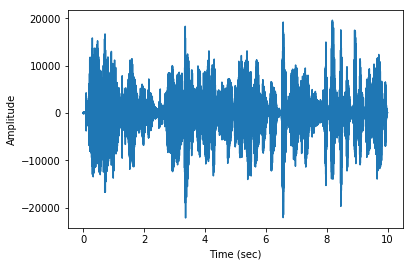

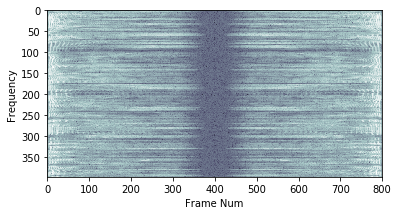

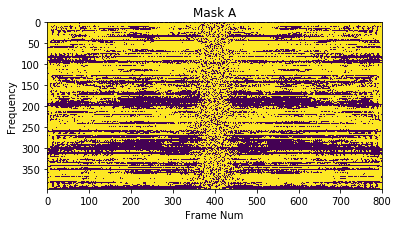

In [3]:
# Spectrograms
sndaft = stft( snda, fs, 0.05, 0.025)
sndbft = stft( sndb, fs, 0.05, 0.025)
sndabft = stft( sndab, fs, 0.05, 0.025)

# Spectral mask
snda_mask = abs(sndaft) > abs(sndbft)

# Plot time and spectrum
t = np.linspace(0, len(sndab)/fs, num=len(sndab))
plt.figure(); plt.plot(t,sndab); plt.ylabel('Amplitude'); plt.xlabel('Time (sec)')
plt.figure(); plt.imshow(np.log(abs(sndabft)), cmap='bone'); plt.ylabel('Frequency'); plt.xlabel('Frame Num')
plt.figure(); plt.imshow(snda_mask); plt.title('Mask A'); plt.ylabel('Frequency'); plt.xlabel('Frame Num')

## Reconstruction (first Fourier and time-domain)

In [4]:
sndareconft = abs(sndabft)*snda_mask*np.exp( 1j* np.angle(sndabft))  # Apply mask A
sndarecon = istft( sndareconft, fs, 5, 0.025 )

sndbreconft = abs(sndabft)*(1-snda_mask)*np.exp( 1j* np.angle(sndabft))  # Apply mask B = 1 - A
sndbrecon = istft( sndbreconft, fs, 5, 0.025 )

## Play audio

In [5]:
print('Original signal')
display(Audio(sndab, rate=fs))
print('Reconstruction of signal A')
display(Audio(sndarecon,rate=fs))
print('Reconstruction of signal B')
display(Audio(sndbrecon,rate=fs))

Original signal


Reconstruction of signal A


Reconstruction of signal B
